In [1]:
import os
import opyplus as op
import warnings
warnings.filterwarnings("ignore")

eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

In [ ]:
# idf path
idf_path = os.path.join(
    eplus_dir_path,
    "ExampleFiles",
    "DOEE-EnergyPlus V0.1.2(EASTTabriz).idf"
)

# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_Tabriz.407060_ITMY.epw"
)

base_dir_path = os.path.join(
    eplus_dir_path,
    "Result","Tehran(NORTH)"
) 
# run simulation
s = op.simulate(
    idf_path,
    epw_path,
    base_dir_path,
    simulation_name=None,
    print_function=None,
    beat_freq=None,
)

called Simulation.from_input on a simulation directory that is not empty (C:\\EnergyPlusV9-2-0\Result\Tehran(NORTH))


In [4]:
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2022.02.02 14:04,
   ** Warning ** ProcessScheduleInput: Schedule:Day:Interval="SCHEDULE DAY 1", , One or more values are not integer as required by Schedule Type Limits Name=ONOFF
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** Weather file location will be used rather than entered (IDF) Location object.
   **   ~~~   ** ..Location object=TEHRAN MEHRABAD
   **   ~~~   ** ..Weather File Location=Tabriz - IRN ITMY WMO#=407060
   **   ~~~   ** ..due to location differences, Latitude difference=[2.64] degrees, Longitude difference=[5.02] degrees.
   **   ~~~   ** ..Time Zone difference=[0.0] h

In [5]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year 2013
hourly_output.create_datetime_index(2018)

# get Pandas dataframe
df = hourly_output.get_data()

# monthly resample and display
#print(df[[
#    "environment,Site Outdoor Air Drybulb Temperature",
#    "main zone,Zone Mean Air Temperature"
#]].resample("MS").mean())

In [6]:
df

,month,day,hour,minute,end_minute,dst,day_type,"thermal zone: amphitheater,Zone Air Temperature","thermal zone: conferance,Zone Air Temperature","thermal zone: corridor1,Zone Air Temperature",...,"ahu lab,Air System Outdoor Air Flow Fraction","ahu library,Air System Outdoor Air Flow Fraction","ahu north-gf,Air System Outdoor Air Flow Fraction","ahu north1-2,Air System Outdoor Air Flow Fraction","ahu north3,Air System Outdoor Air Flow Fraction","ahu south-gf,Air System Outdoor Air Flow Fraction","ahu south1-2,Air System Outdoor Air Flow Fraction","ahu south3,Air System Outdoor Air Flow Fraction","electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1,0,0,10,0,Sunday,22.005029,21.989610,22.000222,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.866968e+07,2.923386e+08
2018-01-01 00:10:00,1,1,0,10,20,0,Sunday,21.954376,21.937901,22.000353,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.888003e+07,2.952404e+08
2018-01-01 00:20:00,1,1,0,20,30,0,Sunday,21.902840,21.888970,22.000531,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.908821e+07,2.983480e+08
2018-01-01 00:30:00,1,1,0,30,40,0,Sunday,21.848740,21.837295,22.000171,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.930348e+07,3.014232e+08
2018-01-01 00:40:00,1,1,0,40,50,0,Sunday,21.791882,21.782620,22.000145,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,1.952653e+07,3.047072e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,12,31,23,10,20,0,Sunday,20.835176,20.718424,22.001386,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,2.237522e+07,3.474635e+08
2018-12-31 23:20:00,12,31,23,20,30,0,Sunday,20.825115,20.703623,22.001482,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,2.244466e+07,3.483687e+08
2018-12-31 23:30:00,12,31,23,30,40,0,Sunday,20.803282,20.677005,22.001580,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,2.251413e+07,3.493234e+08
2018-12-31 23:40:00,12,31,23,40,50,0,Sunday,20.778244,20.647822,22.001679,...,0.063,0.063,0.063,0.063,0.063,0.063,0.063,0.063,2.258348e+07,3.503799e+08


In [7]:
import pandas as pd
df=pd.DataFrame(data=df)
import pandas as pd
df2=df[['month','electricity:facility,Meter','gas:facility,Meter']]
df2

,month,"electricity:facility,Meter","gas:facility,Meter"
2018-01-01 00:00:00,1,1.866968e+07,2.923386e+08
2018-01-01 00:10:00,1,1.888003e+07,2.952404e+08
2018-01-01 00:20:00,1,1.908821e+07,2.983480e+08
2018-01-01 00:30:00,1,1.930348e+07,3.014232e+08
2018-01-01 00:40:00,1,1.952653e+07,3.047072e+08
...,...,...,...
2018-12-31 23:10:00,12,2.237522e+07,3.474635e+08
2018-12-31 23:20:00,12,2.244466e+07,3.483687e+08
2018-12-31 23:30:00,12,2.251413e+07,3.493234e+08
2018-12-31 23:40:00,12,2.258348e+07,3.503799e+08


In [8]:
df3=df2.groupby('month').sum()
df3

,"electricity:facility,Meter","gas:facility,Meter"
month,,
1,1.645850e+11,1.175708e+12
2,1.416724e+11,9.053096e+11
3,1.472654e+11,4.322807e+11
4,1.194446e+11,0.000000e+00
5,1.512296e+11,0.000000e+00
6,1.680640e+11,0.000000e+00
7,1.886980e+11,0.000000e+00
8,1.969376e+11,0.000000e+00
9,1.601137e+11,0.000000e+00


<AxesSubplot:xlabel='month'>

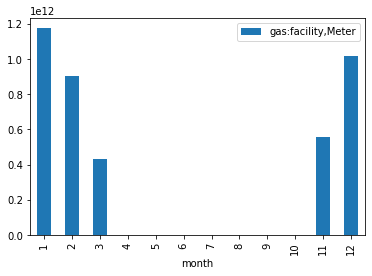

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df3.plot.bar(x=None,y='gas:facility,Meter')